In [ ]:
!pip install datasets==2.16.1

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86

In [ ]:
from transformers import AutoTokenizer

AttributeError: type object 'AutoTokenizer' has no attribute 'train_new_from_iterator'

In [ ]:
from datasets import load_dataset
data = load_dataset('code-search-net/code_search_net','python')

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for code-search-net/code_search_net contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/code-search-net/code_search_net
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/412178 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/22176 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/23107 [00:00<?, ? examples/s]

In [ ]:
data

DatasetDict({
    train: Dataset({
        features: ['repository_name', 'func_path_in_repository', 'func_name', 'whole_func_string', 'language', 'func_code_string', 'func_code_tokens', 'func_documentation_string', 'func_documentation_tokens', 'split_name', 'func_code_url'],
        num_rows: 412178
    })
    test: Dataset({
        features: ['repository_name', 'func_path_in_repository', 'func_name', 'whole_func_string', 'language', 'func_code_string', 'func_code_tokens', 'func_documentation_string', 'func_documentation_tokens', 'split_name', 'func_code_url'],
        num_rows: 22176
    })
    validation: Dataset({
        features: ['repository_name', 'func_path_in_repository', 'func_name', 'whole_func_string', 'language', 'func_code_string', 'func_code_tokens', 'func_documentation_string', 'func_documentation_tokens', 'split_name', 'func_code_url'],
        num_rows: 23107
    })
})

In [ ]:
def text_gen(data_split):
  for i in range(0,len(data_split),1000):
    yield data_split[i:i+1000]['whole_func_string']

corpus = text_gen(data['train'])

In [ ]:
old_tokenizer = AutoTokenizer.from_pretrained('gpt2')


In [ ]:
new_tokenizer = old_tokenizer.train_new_from_iterator(corpus,50000)

In [ ]:
import numpy as np
example = """
class potatos(Model):
  def __init__(self,x):
    super().__init__()
    self.x = x
    self.y = x**2
"""

print(np.array([old_tokenizer.decode(token) for token in old_tokenizer(example)['input_ids']]))
print('\n\n')
print(np.array([new_tokenizer.decode(token) for token in new_tokenizer(example)['input_ids']]))

['\n' 'class' ' pot' 'atos' '(' 'Model' '):' '\n' ' ' ' def' ' __' 'init'
 '__' '(' 'self' ',' 'x' '):' '\n' ' ' ' ' ' ' ' super' '().' '__' 'init'
 '__' '()' '\n' ' ' ' ' ' ' ' self' '.' 'x' ' =' ' x' '\n' ' ' ' ' ' '
 ' self' '.' 'y' ' =' ' x' '**' '2' '\n']



['\n' 'class' ' pot' 'at' 'os' '(' 'Model' '):' '\n ' ' def' ' __' 'init'
 '__(' 'self' ',' 'x' '):' '\n   ' ' super' '().__' 'init' '__()' '\n   '
 ' self' '.' 'x' ' =' ' x' '\n   ' ' self' '.' 'y' ' =' ' x' '**' '2' '\n']


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
new_tokenizer.push_to_hub('HamzaNaser/my_first_tokenizer')

CommitInfo(commit_url='https://huggingface.co/HamzaNaser/my_first_tokenizer/commit/ed54c03004ad937b29026a96f26fec596b952910', commit_message='Upload tokenizer', commit_description='', oid='ed54c03004ad937b29026a96f26fec596b952910', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
from transformers import AutoTokenizer
from datasets import load_dataset

data = load_dataset('glue','mnli')
data

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 392702
    })
    validation_matched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9815
    })
    validation_mismatched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9832
    })
    test_matched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9796
    })
    test_mismatched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9847
    })
})

In [ ]:
fast_tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
slow_tokenizer = AutoTokenizer.from_pretrained('bert-base-cased',use_fast=False)


tokenizer = fast_tokenizer

In [ ]:
text = 'hello my name is Hamza'
tokenizer = fast_tokenizer

tokens = tokenizer(text)
tokens.tokens(),tokens.is_fast,tokens.word_ids()

(['[CLS]', 'hello', 'my', 'name', 'is', 'Ham', '##za', '[SEP]'],
 True,
 [None, 0, 1, 2, 3, 4, 4, None])

How word_ids is useful??

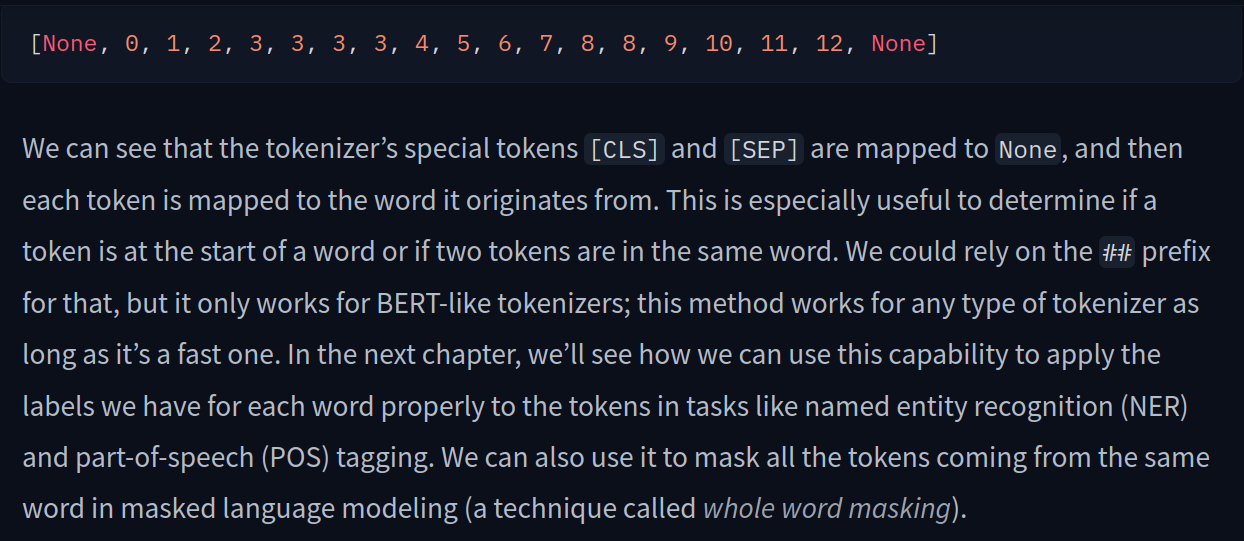

In [ ]:
from transformers import pipeline

token_classifier = pipeline("token-classification")

In [ ]:
text = 'Hamza visited Mohammad in Petra-Jordan last month.'
# text2 = "Don't look at the bird."

encoding = tokenizer(text)

In [ ]:
encoding.tokens()

['[CLS]',
 'Ham',
 '##za',
 'visited',
 'Mohammad',
 'in',
 'Petra',
 '-',
 'Jordan',
 'last',
 'month',
 '.',
 '[SEP]']

In [ ]:
encoding.word_ids()

[None, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, None]

In [ ]:
start,end = encoding.word_to_chars(0)
text[start:end]

'Hamza'

In [ ]:
token_classifier(text)

[{'entity': 'I-PER',
  'score': 0.9990533,
  'index': 1,
  'word': 'Ham',
  'start': 0,
  'end': 3},
 {'entity': 'I-PER',
  'score': 0.985501,
  'index': 2,
  'word': '##za',
  'start': 3,
  'end': 5},
 {'entity': 'I-PER',
  'score': 0.9996705,
  'index': 4,
  'word': 'Mohammad',
  'start': 14,
  'end': 22},
 {'entity': 'I-LOC',
  'score': 0.97291493,
  'index': 6,
  'word': 'Petra',
  'start': 26,
  'end': 31},
 {'entity': 'I-LOC',
  'score': 0.9994906,
  'index': 8,
  'word': 'Jordan',
  'start': 32,
  'end': 38}]

In [ ]:
token_classifier = pipeline("token-classification",aggregation_strategy='simple')

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
token_classifier(text)

[{'entity_group': 'PER',
  'score': 0.99227715,
  'word': 'Hamza',
  'start': 0,
  'end': 5},
 {'entity_group': 'PER',
  'score': 0.9996705,
  'word': 'Mohammad',
  'start': 14,
  'end': 22},
 {'entity_group': 'LOC',
  'score': 0.97291493,
  'word': 'Petra',
  'start': 26,
  'end': 31},
 {'entity_group': 'LOC',
  'score': 0.9994906,
  'word': 'Jordan',
  'start': 32,
  'end': 38}]

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
model_checkpoint = "dbmdz/bert-large-cased-finetuned-conll03-english"


model = AutoModelForTokenClassification.from_pretrained(model_checkpoint)
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
encoding = tokenizer(text,return_tensors='pt')
encoding

{'input_ids': tensor([[  101, 13030,  3293,  3891, 12460,  1107, 23424,   118,  4421,  1314,
          2370,   119,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
encoding.tokens()

['[CLS]',
 'Ham',
 '##za',
 'visited',
 'Mohammad',
 'in',
 'Petra',
 '-',
 'Jordan',
 'last',
 'month',
 '.',
 '[SEP]']

In [ ]:
model(**encoding).logits[0].softmax(-1)

tensor([[9.9962e-01, 7.8356e-06, 2.5773e-05, 1.0864e-05, 4.5653e-05, 1.3050e-05,
         3.6395e-05, 1.1398e-05, 2.3223e-04],
        [2.3005e-04, 3.6249e-05, 1.2077e-04, 2.8359e-05, 9.9905e-01, 2.5633e-05,
         1.1036e-04, 2.9610e-05, 3.6574e-04],
        [7.9588e-03, 3.1795e-04, 8.4933e-04, 8.2278e-05, 9.8550e-01, 2.4893e-04,
         2.9353e-03, 3.0919e-04, 1.7972e-03],
        [9.9997e-01, 1.4441e-06, 3.0231e-06, 8.6892e-07, 4.6751e-06, 1.6743e-06,
         8.6182e-06, 1.5790e-06, 4.9995e-06],
        [9.0004e-05, 1.8485e-05, 4.7105e-05, 8.7433e-06, 9.9967e-01, 1.3374e-05,
         6.3476e-05, 6.6851e-06, 8.1627e-05],
        [9.9997e-01, 1.3184e-06, 4.6330e-06, 8.5631e-07, 3.2209e-06, 2.0191e-06,
         1.0683e-05, 1.8381e-06, 8.4337e-06],
        [2.8043e-03, 7.2468e-04, 5.8188e-03, 1.8386e-04, 2.7859e-03, 3.5717e-04,
         1.4123e-02, 2.8686e-04, 9.7292e-01],
        [9.9650e-01, 5.3448e-05, 4.8861e-04, 2.2281e-05, 1.1359e-04, 1.0367e-04,
         1.1185e-03, 5.3081e-0

In [ ]:
result_labels = model(**encoding).logits[0].argmax(dim=-1)
result_labels

tensor([0, 4, 4, 0, 4, 0, 8, 0, 8, 0, 0, 0, 0])

In [ ]:
encoding_with_offset = tokenizer(text,return_offsets_mapping=True)

In [ ]:
result = []
encoding.tokens()
for i,token in enumerate(encoding.tokens()):
  class_ = int(result_labels[i].numpy())
  if class_:
    entity_group = model.config.id2label[class_]
    word = token
    start, end = encoding_with_offset['offset_mapping'][i]
    append_result = {
        'entity_group':entity_group,
        'word': word,
        'start': start,
        'end':end
    }
    result.append(append_result)
    print(append_result)

{'entity_group': 'I-PER', 'word': 'Ham', 'start': 0, 'end': 3}
{'entity_group': 'I-PER', 'word': '##za', 'start': 3, 'end': 5}
{'entity_group': 'I-PER', 'word': 'Mohammad', 'start': 14, 'end': 22}
{'entity_group': 'I-LOC', 'word': 'Petra', 'start': 26, 'end': 31}
{'entity_group': 'I-LOC', 'word': 'Jordan', 'start': 32, 'end': 38}


In [ ]:
result

[{'entity_group': 'I-PER', 'word': 'Ham', 'start': 0, 'end': 3},
 {'entity_group': 'I-PER', 'word': '##za', 'start': 3, 'end': 5},
 {'entity_group': 'I-PER', 'word': 'Mohammad', 'start': 14, 'end': 22},
 {'entity_group': 'I-LOC', 'word': 'Petra', 'start': 26, 'end': 31},
 {'entity_group': 'I-LOC', 'word': 'Jordan', 'start': 32, 'end': 38}]

In [ ]:
from transformers import AutoTokenizer

tokenizer_cased = AutoTokenizer.from_pretrained('bert-base-cased')
tokenizer_uncased = AutoTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
text = 'Hello My name IS   HAMZA'
tokenizer_cased(text).tokens(),tokenizer_uncased(text).tokens()

(['[CLS]', 'Hello', 'My', 'name', 'IS', 'H', '##AM', '##Z', '##A', '[SEP]'],
 ['[CLS]', 'hello', 'my', 'name', 'is', 'ham', '##za', '[SEP]'])

In [ ]:

text = 'السّلامُ عَلَيْكُمْ'
print(tokenizer_cased.backend_tokenizer.normalizer.normalize_str(text))
print(tokenizer_uncased.backend_tokenizer.normalizer.normalize_str(text))

السّلامُ عَلَيْكُمْ
السلام عليكم


In [ ]:
text = 'السّلامُ عَلَيْكُمْ.'
print(tokenizer_cased.backend_tokenizer.pre_tokenizer.pre_tokenize_str(text))
print(tokenizer_uncased.backend_tokenizer.pre_tokenizer.pre_tokenize_str(text))

[('السّلامُ', (0, 8)), ('عَلَيْكُمْ', (9, 19)), ('.', (19, 20))]
[('السّلامُ', (0, 8)), ('عَلَيْكُمْ', (9, 19)), ('.', (19, 20))]


In [ ]:
text = 'How are  you!'
tokenizer = AutoTokenizer.from_pretrained('gpt2')
tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(text)

[('How', (0, 3)),
 ('Ġare', (3, 7)),
 ('Ġ', (7, 8)),
 ('Ġyou', (8, 12)),
 ('!', (12, 13))]

In [ ]:
tokenizer(text)

['How', 'Ġare', 'Ġ', 'Ġyou', '!']

### Tokenizers from scratch

#### BERT un-cased

In [ ]:
from tokenizers import decoders, models, normalizers,pre_tokenizers, processors, trainers, Tokenizer
from tokenizers import Regex
from datasets import load_dataset
import re

In [ ]:

data = load_dataset('wikitext','wikitext-2-raw-v1',split='train')
def get_corpus():
  for i in range(0,len(data),1000):
    yield data['text'][i:i+1000]

In [ ]:

# 1) Build Tokenizer
tokenizer = Tokenizer(models.WordPiece(unk_token='[UNK]'))


# 2) Build Normalizer
# tokenizer.normalizer = normalizers.BertNormalizer(lowercase = True)
tokenizer.normalizer = normalizers.Sequence([
    normalizers.Replace(Regex(r"[`']"),''),
    normalizers.NFD(),  # Unicode normalizer will help StipAccents normalizer to recognize accented charachters so it can strip them
    normalizers.Lowercase(),
    normalizers.StripAccents()
])


# 3) Build Pre-Tokenizer
# tokenizer.pre_tokenizer = pre_tokenizers.BertPreTokenizer()
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

# or
tokenizer.pre_tokenizer = pre_tokenizers.Sequence([
    pre_tokenizers.WhitespaceSplit(),
    pre_tokenizers.Punctuation()
])


# 4) Build Trainer
special_tokens = ["[UNK]","[PAD]","[SEP]","[CLS]","[MASK]"]
trainer = trainers.WordPieceTrainer(vocab_size=25000,special_tokens = special_tokens)


In [ ]:
# test normalizer
text = "I'll come to my friend's home. He came from the U.S.A"
normalized_text = tokenizer.normalizer.normalize_str(text)
print(normalized_text)

# test pre_tokenizer
pre_tokenized_text = tokenizer.pre_tokenizer.pre_tokenize_str(normalized_text)
print(pre_tokenized_text)

ill come to my friends home. he came from the u.s.a
[('ill', (0, 3)), ('come', (4, 8)), ('to', (9, 11)), ('my', (12, 14)), ('friends', (15, 22)), ('home', (23, 27)), ('.', (27, 28)), ('he', (29, 31)), ('came', (32, 36)), ('from', (37, 41)), ('the', (42, 45)), ('u', (46, 47)), ('.', (47, 48)), ('s', (48, 49)), ('.', (49, 50)), ('a', (50, 51))]


In [ ]:
# 5) Traning
tokenizer.train_from_iterator(get_corpus(),trainer=trainer)

In [ ]:
tokenizer.encode("Let's test this").tokens

['let', '##s', 'test', 'this']

In [ ]:
# 6) Set up [CLS] and [SEP] tokens and pair sequence logic to make BERT like tokenizers

print(tokenizer.token_to_id("[CLS]"),tokenizer.token_to_id("[SEP]"))

tokenizer.post_processor = processors.TemplateProcessing(
    single = f"[CLS]:0 $A:0 [SEP]:0",
    pair = f"[CLS]:0 $A:0 [SEP]:0 $B:1 [SEP]:1",
    special_tokens = [("[CLS]",3),("[SEP]",2)]
)

3 2


In [ ]:
result = tokenizer.encode('Hello Hamza','hi    hamza')

In [ ]:
result.tokens

['[CLS]', 'hell', '##o', 'ham', '##za', '[SEP]', 'hi', 'ham', '##za', '[SEP]']

In [ ]:
from transformers import PreTrainedTokenizerFast, BertTokenizerFast

# 7) Set up decoder
tokenizer.decoder = decoders.WordPiece(prefix='##')

tokenizer.save('tokenizer.json')
# 8) wrap to FastTokenizer object
wrapped_tokenizer = PreTrainedTokenizerFast(
    tokenizer_object = tokenizer,
    unk_token="[UNK]",
    pad_token="[PAD]",
    cls_token="[CLS]",
    sep_token="[SEP]",
    mask_token="[MASK]",
)


# or
wrapped_tokenizer = BertTokenizerFast(
    tokenizer_object = tokenizer
)



In [ ]:
wrapped_tokenizer('hello','hi')

{'input_ids': [3, 6008, 793, 2, 7602, 2], 'token_type_ids': [0, 0, 0, 0, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1]}

#### BPE

In [ ]:
!wget https://raw.githubusercontent.com/dariusk/harpooneers/master/corpus.txt

--2024-08-04 05:24:33--  https://raw.githubusercontent.com/dariusk/harpooneers/master/corpus.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18314868 (17M) [text/plain]
Saving to: ‘corpus.txt’

corpus.txt          100%[===================>]  17.47M  80.5MB/s    in 0.2s    

2024-08-04 05:24:33 (80.5 MB/s) - ‘corpus.txt’ saved [18314868/18314868]



In [ ]:
from tokenizers import Tokenizer, models, normalizers, pre_tokenizers, trainers, processors, decoders

def text_corpus():
  with open("/content/corpus.txt",'r') as f:
    for line in f:
      yield line


tokenizer = Tokenizer(model=models.BPE())

tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel(add_prefix_space=False)


trainer = trainers.BpeTrainer(vocab_size=25000,special_tokens=["<|endoftext|>"])

tokenizer.train_from_iterator(text_corpus(),trainer=trainer)

In [ ]:
tokenizer.encode('hello my name is hamza').tokens

['he', 'llo', 'Ġmy', 'Ġname', 'Ġis', 'Ġham', 'za']

In [ ]:
tokenizer.token_to_id("<|endoftext|>")

0

In [ ]:
from transformers import PreTrainedTokenizerFast, GPT2TokenizerFast
# tokenizer.post_processor = processors.TemplateProcessing(
#     single= f'$A:0 <|endoftext|>:0',
#     special_tokens = [("<|endoftext|>",0)]
# )

tokenizer.post_processor = processors.ByteLevel(trim_offsets=False)
tokenizer.decoder = decoders.ByteLevel()

wraped_tokenizer = PreTrainedTokenizerFast(
    tokenizer_object = tokenizer,
    bos_token = "<|endoftext|>",
    eos_token = "<|endoftext|>"
)
# or

wraped_tokeznier = GPT2TokenizerFast(tokenizer_object = tokenizer)

In [ ]:
wraped_tokeznier('Hello my name is      hamza').tokens()

['Hello', 'Ġmy', 'Ġname', 'Ġis', 'ĠĠĠĠĠ', 'Ġham', 'za']

#### Unigram Tokenizer

In [ ]:
tokenzier = Tokenizer(models.Unigram())

from tokenizers import Regex

tokenizer.normalizer = normalizers.Sequence(
    [
        normalizers.Replace("``", '"'),
        normalizers.Replace("''", '"'),
        normalizers.NFKD(),
        normalizers.StripAccents(),
        normalizers.Replace(Regex(" {2,}"), " "),
    ]
)

tokenizer.pre_tokenizer = pre_tokenizers.Metaspace()


In [ ]:
tokenizer.normalizer.normalize_str("''my name is hamza")

'"my name is hamza'

In [ ]:
special_tokens = ["<cls>", "<sep>", "<unk>", "<pad>", "<mask>", "<s>", "</s>"]
trainer = trainers.UnigramTrainer(
    vocab_size=25000, special_tokens=special_tokens, unk_token="<unk>"
)
tokenizer.model = models.Unigram()
tokenizer.train_from_iterator(text_corpus(), trainer=trainer)


In [ ]:
cls_token_id = tokenizer.token_to_id("<cls>")
sep_token_id = tokenizer.token_to_id("<sep>")
print(cls_token_id, sep_token_id)

0 1


In [ ]:
tokenizer.post_processor = processors.TemplateProcessing(
    single="$A:0 <sep>:0 <cls>:2",
    pair="$A:0 <sep>:0 $B:1 <sep>:1 <cls>:2",
    special_tokens=[("<sep>", sep_token_id), ("<cls>", cls_token_id)],
)

In [ ]:
tokenizer.decoder = decoders.Metaspace()

In [ ]:
from transformers import PreTrainedTokenizerFast

wrapped_tokenizer = PreTrainedTokenizerFast(
    tokenizer_object=tokenizer,
    bos_token="<s>",
    eos_token="</s>",
    unk_token="<unk>",
    pad_token="<pad>",
    cls_token="<cls>",
    sep_token="<sep>",
    mask_token="<mask>",
    padding_side="left",
)

# Or

from transformers import XLNetTokenizerFast

wrapped_tokenizer = XLNetTokenizerFast(tokenizer_object=tokenizer)

In [ ]:
text = 'hello hamza'
[text[map[0]:map[1]] if map != (0,0) else '<SP>'for map in wrapped_tokenizer(text,return_offsets_mapping=True)['offset_mapping']]

['hell', 'o', ' ham', 'za', '<SP>', '<SP>']